dict_keys(['__header__', '__version__', '__globals__', 'X', 'Y', 'Y0', 'file_path', 'grayimage', 'shuifen', 'wavelength'])


c:\Users\79365\anaconda3\envs\42\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


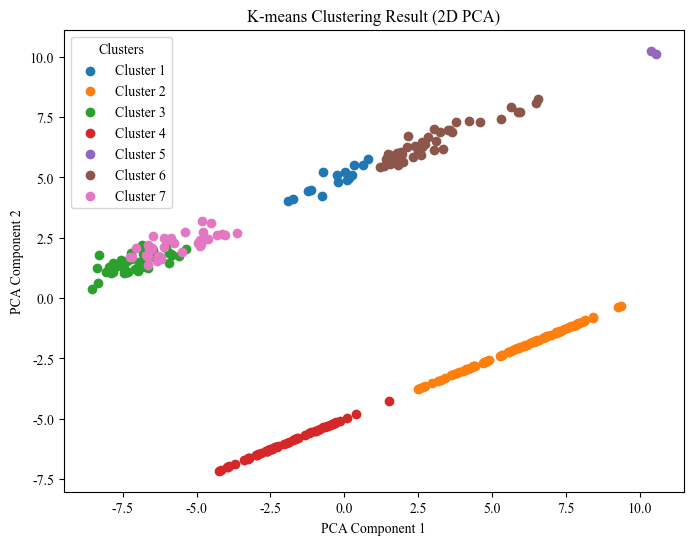

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 6 2 6 2 2 2 6 2 2 2 2 2 2 2 2 2 6 2 2 2 0 5 5 5 5 5 0 5 5 5 5 5 0 5
 0 5 5 5 5 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 0 5 5 0 0 5 0 5 5 0
 0 0 5 0 0 0 5 5 0 2 2 2 2 2 6 2 2 6 2 6 6 6 6 6 6 6 6 2 6 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [1]:
import numpy as np
import scipy.io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

# 1. 加载MAT文件
file_path = r"C:\Users\79365\Desktop\多光谱数据\alldata\all.mat"
mat_data = scipy.io.loadmat(file_path)

# 查看文件中的数据键
print(mat_data.keys())

# 假设数据在 'all_data' 键下，且数据是280x47矩阵
data = mat_data['X']

# 确保数据的形状是(280, 47)
data = np.array(data)

# 2. 数据标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. 进行 K-means 聚类（假设选择 7 个聚类）
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# 获取聚类标签
labels = kmeans.labels_

# 4. 可视化聚类结果（使用PCA降维到2D）
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# 创建一个7个颜色的自定义色盘
colors = list(mcolors.TABLEAU_COLORS.values())  # 7种不同颜色
import matplotlib.pyplot as plt

# 设置字体为支持中文的字体，例如 SimHei
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 绘制聚类结果
plt.figure(figsize=(8, 6))
for i in range(7):
    plt.scatter(data_2d[labels == i, 0], data_2d[labels == i, 1], label=f"Cluster {i+1}", color=colors[i])

plt.title('K-means Clustering Result (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Clusters")
plt.show()

# 输出每个样本的聚类标签
print(f"Cluster labels: {labels}")


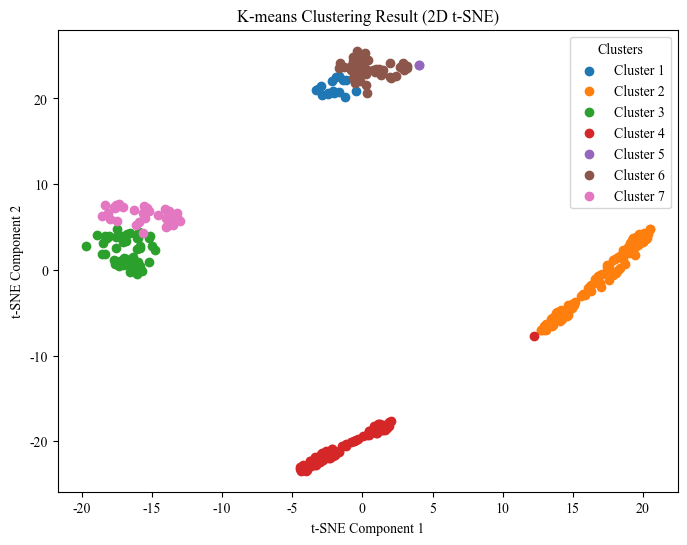

In [2]:
from sklearn.manifold import TSNE

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# 绘制 t-SNE 降维结果
plt.figure(figsize=(8, 6))
for i in range(7):
    plt.scatter(data_tsne[labels == i, 0], data_tsne[labels == i, 1], label=f"Cluster {i+1}", color=colors[i])

plt.title('K-means Clustering Result (2D t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title="Clusters")
plt.show()
